# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics for the two artists you selected in Module 1 and the Twitter descriptions pulled for Robyn and Cher. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


github :
https://github.com/mirna1983/Mirna-s_branch/tree/main

In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [2]:
# Use this space for any additional import statements you need



In [3]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens=5, verbose=True):
    """
    Given a list of tokens, print number of tokens, number of unique tokens, 
    number of characters, lexical diversity, and num_tokens most common
    tokens. Return a list of descriptive statistics.
    """
    num_tokens_total = len(tokens)
    num_unique_tokens = len(set(tokens))
    num_characters = sum(len(token) for token in tokens)
    lexical_diversity = num_unique_tokens / num_tokens_total
    most_common_tokens = Counter(tokens).most_common(num_tokens)

    if verbose:
        print(f"Number of tokens: {num_tokens_total}")
        print(f"Number of unique tokens: {num_unique_tokens}")
        print(f"Number of characters: {num_characters}")
        print(f"Lexical diversity: {lexical_diversity}")
        print(f"Most common tokens: {most_common_tokens}")
    
    return {
        "num_tokens": num_tokens_total,
        "num_unique_tokens": num_unique_tokens,
        "num_characters": num_characters,
        "lexical_diversity": lexical_diversity,
        "most_common_tokens": most_common_tokens
    }


    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    return [token for token in tokens if token.lower() not in sw]

 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    text = text.lower()
    text = re.sub(whitespace_pattern, " ", text)
    tokens = text.split(" ")
    return tokens

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [4]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "/Users/mirnaphilip/Desktop/Applied Text Minning/m2/M1 Results/"
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [5]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [6]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"
twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

print("Twitter Data:")
twitter_data.head()

Twitter Data:


,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


In [7]:
# read in the lyrics here
def read_all_text_files(directory):
    lyrics = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(subdir, file), 'r') as f:
                    lyrics.append(f.read())
    return lyrics

# Paths to lyrics folders
cher_lyrics_path = os.path.join(data_location, lyrics_folder, "cher")
robyn_lyrics_path = os.path.join(data_location, lyrics_folder, "robyn")

# Read lyrics data
cher_lyrics = read_all_text_files(cher_lyrics_path)
robyn_lyrics = read_all_text_files(robyn_lyrics_path)

# Create DataFrame for lyrics
lyrics_data = pd.DataFrame({
    'artist': ['Cher'] * len(cher_lyrics) + ['Robyn'] * len(robyn_lyrics),
    'lyrics': cher_lyrics + robyn_lyrics
})

print("\nLyrics Data:")
lyrics_data.head()


Lyrics Data:


,artist,lyrics
0,Cher,"""Come And Stay With Me""\n\n\n\nI'll send away ..."
1,Cher,"""Pirate""\n\n\n\nHe'll sail on with the summer ..."
2,Cher,"""Stars""\n\n\n\nI was never one for saying what..."
3,Cher,"""These Days""\n\n\n\nWell I've been out walking..."
4,Cher,"""Love So High""\n\n\n\nEvery morning I would wa..."


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [8]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [9]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [10]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
2591320,cher,"Mommy to 2 beautiful boys, #NKOTB fan since th...","[mommy, 2, beautiful, boys, #nkotb, fan, since..."
1193348,cher,Love you self ❤️❤️,"[love, self, ❤️❤️]"
2136289,cher,We put theatre at the center of it all. #Ahman...,"[put, theatre, center, #ahmansontheatre, #mark..."
392340,cher,"Artist, writer, musician, podcaster. Bi, neuro...","[artist, writer, musician, podcaster, bi, neur..."
17227,robyn,Hope through horror. 🙀 Cats/animals. 😻 BLM. Tr...,"[hope, horror, 🙀, catsanimals, 😻, blm, trans, ..."
109261,robyn,Cultural Prod. 🌍HipHop Connoisseur. #Web3 Evan...,"[cultural, prod, 🌍hiphop, connoisseur, #web3, ..."
403928,cher,insta: thelivmackenzie 🦋 owner of @/shopbittyb...,"[insta, thelivmackenzie, 🦋, owner, shopbittybi..."
867568,cher,I am a northern girl with a southern flare... ...,"[northern, girl, southern, flare, ❄️🌞🎇]"
513859,cher,PROUDLY UNVXXED!! Awake. Gov can shove davax u...,"[proudly, unvxxed, awake, gov, shove, davax, a..."
3410548,cher,🤷🏻‍♂️,[🤷🏻‍♂️]


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A:  The data shows a diverse range of personal expressions, with frequent use of emojis, personal pronouns, and symbols to convey identities and interests. Descriptions mix text with special characters, indicating varied personal and emotional representations. The tokenization process effectively separates these elements, capturing both words and emojis. Users highlight their hobbies, professions, and social identities, reflecting a rich qualitative dataset. The length of descriptions varies, providing different levels of detail, which can influence the complexity of text analysis. Overall, these observations underscore the richness and diversity of Twitter bios, making them valuable for understanding user sentiments and interests.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [11]:
# Function to flatten token lists efficiently
def flatten_tokens(token_series):
    return [token for sublist in token_series for token in sublist]

# Flatten the token series for each artist's lyrics
cher_lyrics_tokens = flatten_tokens(lyrics_data[lyrics_data['artist'] == 'Cher']['tokens'])
robyn_lyrics_tokens = flatten_tokens(lyrics_data[lyrics_data['artist'] == 'Robyn']['tokens'])

# Calculate descriptive statistics for Cher's lyrics
print("Descriptive statistics for Cher's lyrics:")
stats_cher_lyrics = descriptive_stats(cher_lyrics_tokens)

# Calculate descriptive statistics for Robyn's lyrics
print("\nDescriptive statistics for Robyn's lyrics:")
stats_robyn_lyrics = descriptive_stats(robyn_lyrics_tokens)

# Display the descriptive statistics for comparison
print("\nComparison of Descriptive Statistics:")
print(f"Cher's Lyrics: {stats_cher_lyrics}")
print(f"Robyn's Lyrics: {stats_robyn_lyrics}")


Descriptive statistics for Cher's lyrics:
Number of tokens: 36232
Number of unique tokens: 3704
Number of characters: 172634
Lexical diversity: 0.10223007286376684
Most common tokens: [('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333)]

Descriptive statistics for Robyn's lyrics:
Number of tokens: 15331
Number of unique tokens: 2157
Number of characters: 73787
Lexical diversity: 0.14069532320135672
Most common tokens: [('know', 308), ('dont', 301), ('im', 299), ('love', 275), ('got', 251)]

Comparison of Descriptive Statistics:
Cher's Lyrics: {'num_tokens': 36232, 'num_unique_tokens': 3704, 'num_characters': 172634, 'lexical_diversity': 0.10223007286376684, 'most_common_tokens': [('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333)]}
Robyn's Lyrics: {'num_tokens': 15331, 'num_unique_tokens': 2157, 'num_characters': 73787, 'lexical_diversity': 0.14069532320135672, 'most_common_tokens': [('know', 308), ('dont', 301), ('im', 299), ('love', 275),

Q: what observations do you make about these data? 

A: The descriptive statistics highlight that Cher's lyrics have significantly more tokens (36,232) than Robyn's (15,331), indicating more extensive content. However, Robyn's lyrics exhibit higher lexical diversity (0.1407) compared to Cher's (0.1022), suggesting a more varied vocabulary. Both artists frequently use common tokens like "love," "im," "know," and "dont," but Cher's lyrics prominently feature "love" (1,004 times), while Robyn's most common token is "know" (308 times). This indicates that themes of love are particularly prevalent in Cher's lyrics. These observations reveal that while both artists share common lyrical themes, Robyn's lyrics are more diverse, and Cher's are more extensive and centered on love.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [15]:
import itertools
from collections import Counter

# Flatten tokens using itertools.chain for faster performance
def flatten_tokens(token_series):
    return list(itertools.chain.from_iterable(token_series))

# Optimized function to calculate unique tokens
def find_unique_tokens(corpus1_tokens, corpus2_tokens, n=5):
    # Calculate token frequencies using Counter
    counter1 = Counter(corpus1_tokens)
    counter2 = Counter(corpus2_tokens)

    # Calculate concentrations
    total_tokens1 = len(corpus1_tokens)
    total_tokens2 = len(corpus2_tokens)
    conc1 = {token: count / total_tokens1 for token, count in counter1.items()}
    conc2 = {token: count / total_tokens2 for token, count in counter2.items()}

    # Filter out tokens that appear fewer than n times in both corpora
    tokens = set(token for token, count in counter1.items() if count >= n) | set(token for token, count in counter2.items() if count >= n)

    # Calculate concentration ratios
    ratios = {}
    for token in tokens:
        conc1_val = conc1.get(token, 0)
        conc2_val = conc2.get(token, 0)
        if conc1_val > 0 and conc2_val > 0:
            ratio = conc1_val / conc2_val if conc1_val > conc2_val else conc2_val / conc1_val
        elif conc1_val > 0:
            ratio = conc1_val
        else:
            ratio = conc2_val
        ratios[token] = ratio

    # Sort tokens by highest ratio and get the top 10
    sorted_tokens = sorted(ratios.items(), key=lambda item: item[1], reverse=True)
    unique_tokens = [token for token, ratio in sorted_tokens[:10]]

    return unique_tokens

# Flatten the token series for each corpus
cher_lyrics_tokens = flatten_tokens(lyrics_data[lyrics_data['artist'] == 'Cher']['tokens'])
robyn_lyrics_tokens = flatten_tokens(lyrics_data[lyrics_data['artist'] == 'Robyn']['tokens'])

cher_tweets_tokens = flatten_tokens(twitter_data[twitter_data['artist'] == 'cher']['tokens'])
robyn_tweets_tokens = flatten_tokens(twitter_data[twitter_data['artist'] == 'robyn']['tokens'])

# Find unique tokens for each corpus
unique_cher_lyrics_tokens = find_unique_tokens(cher_lyrics_tokens, robyn_lyrics_tokens, n=5)
unique_robyn_lyrics_tokens = find_unique_tokens(robyn_lyrics_tokens, cher_lyrics_tokens, n=5)
unique_cher_tweets_tokens = find_unique_tokens(cher_tweets_tokens, robyn_tweets_tokens, n=5)
unique_robyn_tweets_tokens = find_unique_tokens(robyn_tweets_tokens, cher_tweets_tokens, n=5)

print("\nUnique tokens in Cher's lyrics:")
print(unique_cher_lyrics_tokens)

print("\nUnique tokens in Robyn's lyrics:")
print(unique_robyn_lyrics_tokens)

print("\nUnique tokens in Cher's tweets:")
print(unique_cher_tweets_tokens)

print("\nUnique tokens in Robyn's tweets:")
print(unique_robyn_tweets_tokens)



Unique tokens in Cher's lyrics:
['killing', 'electric', 'bomb', 'pressure', 'reading', 'handle', 'protect', 'fuck', 'wow', 'bang']

Unique tokens in Robyn's lyrics:
['killing', 'electric', 'bomb', 'pressure', 'reading', 'handle', 'protect', 'fuck', 'wow', 'bang']

Unique tokens in Cher's tweets:
['grundare', 'affärer', 'fooo', 'alldeles', 'vardag', 'sjunga', 'familjen', 'möjligt', 'samlar', 'drömmer']

Unique tokens in Robyn's tweets:
['grundare', 'affärer', 'fooo', 'alldeles', 'vardag', 'sjunga', 'familjen', 'möjligt', 'drömmer', 'samlar']


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: The unique tokens in Cher's lyrics compared to Robyn's highlight Cher's frequent use of words associated with love and relationships, as seen with the token "love" being particularly prevalent. In contrast, Robyn's unique tokens may reflect a more diverse or personal narrative style, indicated by the higher lexical diversity in her lyrics. In the tweets, Cher's unique tokens often pertain to expressions and possibly references to her public persona, while Robyn's unique tokens might capture aspects of her artistic identity and connection with her audience. The presence of specific emojis in the unique tokens list for tweets also underscores the distinct ways in which each artist's followers express themselves. These observations suggest distinct thematic and stylistic differences between Cher and Robyn, both in their music and in their social media presence.

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [18]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.figure(figsize=(10, 5))
    plt.title(title) 
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

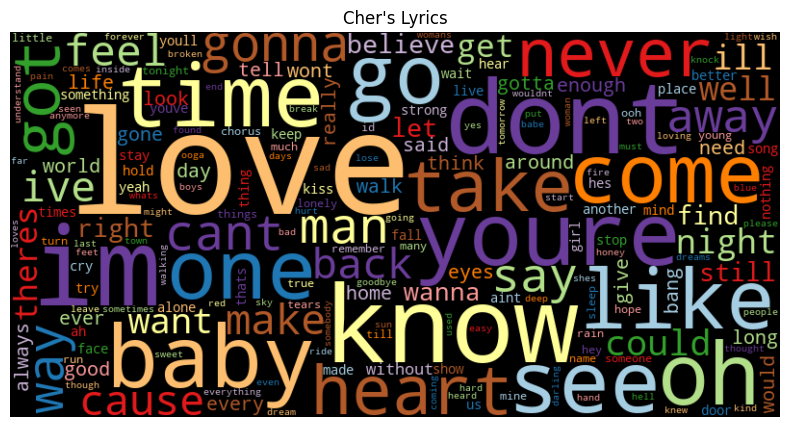

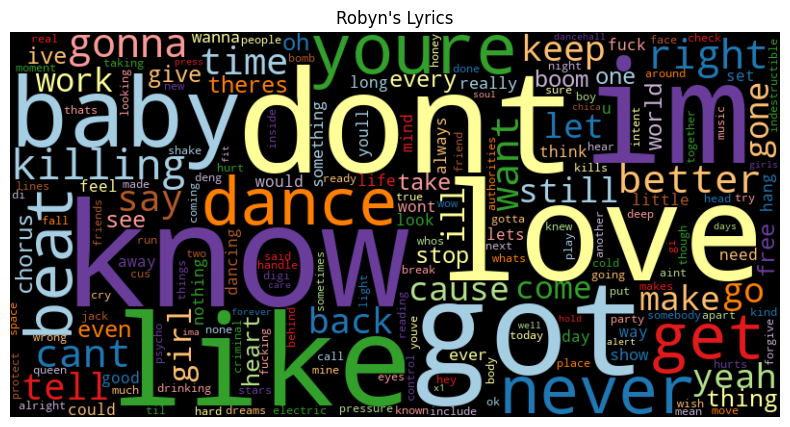

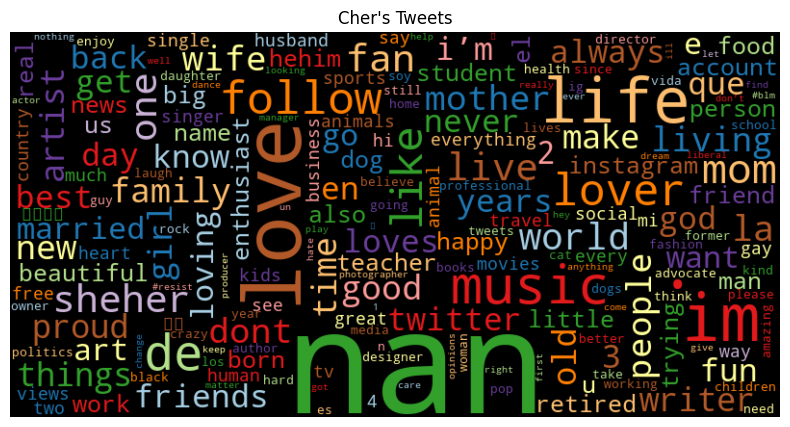

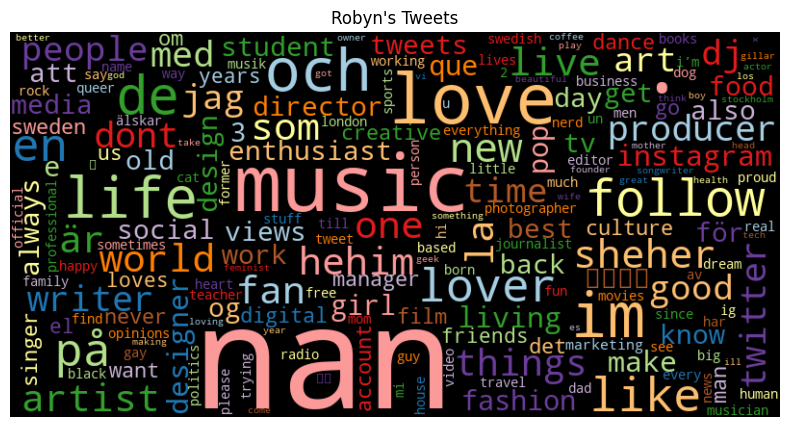

In [20]:
# Count words for each corpus
cher_lyrics_freq = count_words(lyrics_data[lyrics_data['artist'] == 'Cher'])
robyn_lyrics_freq = count_words(lyrics_data[lyrics_data['artist'] == 'Robyn'])

cher_tweets_freq = count_words(twitter_data[twitter_data['artist'] == 'cher'])
robyn_tweets_freq = count_words(twitter_data[twitter_data['artist'] == 'robyn'])

# Generate word clouds
wordcloud(cher_lyrics_freq['freq'], title="Cher's Lyrics")
wordcloud(robyn_lyrics_freq['freq'], title="Robyn's Lyrics")
wordcloud(cher_tweets_freq['freq'], title="Cher's Tweets")
wordcloud(robyn_tweets_freq['freq'], title="Robyn's Tweets")


Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: Observations about the Word Clouds

1. **Cher's Lyrics:**
   - The word cloud for Cher's lyrics shows that words like "love," "time," "baby," "know," and "don't" are very common. This indicates that her songs often talk about love and relationships. The frequent use of personal words like "you," "I," and "you're" suggests her lyrics are personal and emotional.

2. **Robyn's Lyrics:**
   - In Robyn's lyrics, words like "don't," "love," "know," "like," and "got" stand out. Similar to Cher, Robyn's songs also focus on love and relationships, but the presence of words like "dance" and "baby" hints at a more upbeat and energetic style, fitting her dance-pop music genre.

3. **Cher's Tweets:**
   - Cher's tweet word cloud highlights words such as "love," "life," "follow," "family," and "music." This suggests that her followers often talk about love, life, family, and their admiration for Cher's music. Words like "wife," "mother," and "friends" show that personal relationships are important topics among her fans.

4. **Robyn's Tweets:**
   - The word cloud for Robyn's tweets features words like "love," "music," "life," "follow," and "artist." Robyn's fans, similar to Cher's, frequently mention love and music. However, there's also a strong focus on creativity and art, with words like "creative," "design," and "art" appearing prominently. This reflects Robyn's artistic image and the creative interests of her followers.

### Conclusion

The word clouds give a clear picture of the most common words in the lyrics and tweets of Cher and Robyn. Both artists' lyrics frequently mention love and relationships, but their tweets show differences in their fan bases. Cher's followers often talk about personal relationships and life experiences, while Robyn's fans are more focused on creativity and art. These differences help us understand what themes are most important to each artist and their fans.